## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime
from pathlib import Path
import pandas as pd

import torchtext.data as ttd

In [ ]:
folder=Path('/content/gdrive/My Drive/Teaching/NLP/8_Sequence_Code')

In [ ]:
df = pd.read_csv(folder / 'airline.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Id,text,Target
0,1,@USAirways ! THE WORST in customer service. @...,-1
1,2,@united call wait times are over 20 minutes an...,-1
2,3,@JetBlue what's up with the random delay on fl...,-1
3,4,@AmericanAir Good morning! Wondering why my p...,0
4,5,@united UA 746. Pacific Rim and Date Night cut...,-1


In [ ]:
# drop unnecessary columns
df = df.drop(["Id"], axis=1)

In [ ]:
df.head()

,text,Target
0,@USAirways ! THE WORST in customer service. @...,-1
1,@united call wait times are over 20 minutes an...,-1
2,@JetBlue what's up with the random delay on fl...,-1
3,@AmericanAir Good morning! Wondering why my p...,0
4,@united UA 746. Pacific Rim and Date Night cut...,-1


In [ ]:
df['Target']= df['Target'] +1

In [ ]:
df['Target'].value_counts()

0    4566
1    1536
2    1218
Name: Target, dtype: int64

In [ ]:
df.columns = ['data', 'labels']

In [ ]:
df=df.sample(frac=1)

In [ ]:
df.head()

,data,labels
381,@SouthwestAir @PaytonTaylor129 I love Southwes...,2
5934,@united @abigailedge Another glitch??,0
2198,@united sorry for the delayed response. It was...,0
3228,@united how come a $27 shuttle bus from LGA to...,0
3643,@USAirways why now just announce delay of 4478...,0


In [ ]:
df.to_csv(folder / 'airline2.csv', index=False)

In [ ]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    tokenize='spacy',
    pad_first=True)

LABEL = ttd.LabelField()
#LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

dataset = ttd.TabularDataset(
    path= folder / 'airline2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

In [ ]:
import random
SEED=1234
train_dataset, test_dataset = dataset.split(split_ratio=0.7,random_state = random.seed(SEED)) # default is 0.7

In [ ]:
SEED=1234
train_dataset, valid_dataset = train_dataset.split(random_state = random.seed(SEED)) # default is 0.7

In [ ]:
print(f'Number of training examples: {len(train_dataset)}')
print(f'Number of validation examples: {len(valid_dataset)}')
print(f'Number of testing examples: {len(test_dataset)}')

Number of training examples: 3587
Number of validation examples: 1537
Number of testing examples: 2196


In [ ]:
TEXT.build_vocab(train_dataset)
LABEL.build_vocab(train_dataset)

In [ ]:
vocab_text = TEXT.vocab

In [ ]:
vocab_text.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'to': 3,
             'I': 4,
             'the': 5,
             '!': 6,
             '?': 7,
             ',': 8,
             'a': 9,
             'you': 10,
             'for': 11,
             '@united': 12,
             'and': 13,
             '#': 14,
             'on': 15,
             'flight': 16,
             'my': 17,
             '@AmericanAir': 18,
             '@USAirways': 19,
             'is': 20,
             'in': 21,
             '@SouthwestAir': 22,
             "n't": 23,
             'of': 24,
             '@JetBlue': 25,
             ' ': 26,
             'me': 27,
             'it': 28,
             'have': 29,
             'was': 30,
             'that': 31,
             'your': 32,
             '-': 33,
             'with': 34,
             'at': 35,
             "'s": 36,
             'not': 37,
             'do': 38

In [ ]:
vocab_text.itos

['<unk>',
 '<pad>',
 '.',
 'to',
 'I',
 'the',
 '!',
 '?',
 ',',
 'a',
 'you',
 'for',
 '@united',
 'and',
 '#',
 'on',
 'flight',
 'my',
 '@AmericanAir',
 '@USAirways',
 'is',
 'in',
 '@SouthwestAir',
 "n't",
 'of',
 '@JetBlue',
 ' ',
 'me',
 'it',
 'have',
 'was',
 'that',
 'your',
 '-',
 'with',
 'at',
 "'s",
 'not',
 'do',
 'get',
 'from',
 'no',
 'be',
 'but',
 'are',
 'this',
 'Cancelled',
 'we',
 'an',
 'can',
 'now',
 'service',
 '...',
 '"',
 'been',
 ';',
 'so',
 'time',
 '&',
 'help',
 'up',
 'amp',
 'customer',
 'just',
 'hours',
 'out',
 'flights',
 'hold',
 '2',
 "'m",
 'Flight',
 'all',
 'there',
 'they',
 'will',
 'if',
 '_',
 'our',
 'Thanks',
 'thanks',
 'had',
 'still',
 'plane',
 'us',
 'what',
 'would',
 ':',
 'call',
 'when',
 "'ve",
 'Flightled',
 'delayed',
 'gate',
 'did',
 'need',
 'or',
 ')',
 '@VirginAmerica',
 'about',
 'ca',
 'one',
 'hour',
 'bag',
 'back',
 'how',
 'why',
 'Late',
 'has',
 'airline',
 'as',
 '(',
 'after',
 'more',
 'any',
 'am',
 'got',

In [ ]:
vocab_label = LABEL.vocab

In [ ]:
vocab_label.stoi

defaultdict(<function torchtext.vocab._default_unk_index>,
            {'0': 0, '1': 1, '2': 2})

In [ ]:
vocab_label.itos

['0', '1', '2']

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
train_iter, valid_iter, test_iter = ttd.BucketIterator.splits((train_dataset,valid_dataset,test_dataset), 
                              sort_key=lambda x: len(x.data),
                              #sort_key=None,
                              batch_sizes=(64,256,256), 
                              device=device)

In [ ]:
for batch in train_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[   1,    1,    1,  ...,    3, 1295,    7],
        [   1,    1,    1,  ...,   76, 8117, 8072],
        [  12,  994,    2,  ..., 1803, 7144,  182],
        ...,
        [   1,    1,    1,  ...,   34,    9,  225],
        [   1,    1,    1,  ...,  217,   16,    2],
        [   1,    1,    1,  ...,    3,   14, 5465]], device='cuda:0') torch.Size([64, 36])
targets: tensor([0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2,
        2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0], device='cuda:0') shape: torch.Size([64])


In [ ]:
for batch in valid_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[  22,   79,   11,  ...,  216,   52,    0],
        [  18,   10,  169,  ...,    6,   14,    0],
        [  12,   95,   10,  ...,   10,   63,   93],
        ...,
        [   1,    1,    1,  ...,    1,   19, 2428],
        [   1,    1,    1,  ...,    1,   12,    0],
        [   1,    1,    1,  ...,    1,   19,   79]], device='cuda:0') torch.Size([256, 12])
targets: tensor([0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2,
        2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2,
        1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0,
        1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1,
        1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0,
        2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1,

In [ ]:
for batch in test_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[  12,  180,   10,  ...,   32,   59,    2],
        [  22,   49,   10,  ...,  549,    0,    7],
        [  22,  107,    5,  ...,   14,    0,    0],
        ...,
        [   1,    1,    1,  ...,    1,   12, 5210],
        [   1,    1,    1,  ...,    1,   22,  213],
        [   1,    1,    1,  ...,    1,   22,  213]], device='cuda:0') torch.Size([256, 10])
targets: tensor([2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0,
        1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2,
        1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0,
        2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
        2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0,
        2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 1,
        1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
        0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1,

In [ ]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [ ]:
model = RNN(len(vocab_text), 300, 100, 1, 3)
model.to(device)

RNN(
  (embed): Embedding(8144, 300)
  (rnn): LSTM(300, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
)

## Model Summary

In [ ]:
print(model)

RNN(
  (embed): Embedding(8144, 300)
  (rnn): LSTM(300, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=3, bias=True)
)


## Model Parameters

In [ ]:
for name, param in model.named_parameters():
  print(name, param.shape)

embed.weight torch.Size([8144, 300])
rnn.weight_ih_l0 torch.Size([400, 300])
rnn.weight_hh_l0 torch.Size([400, 100])
rnn.bias_ih_l0 torch.Size([400])
rnn.bias_hh_l0 torch.Size([400])
fc.weight torch.Size([3, 100])
fc.bias torch.Size([3])


## Training Loop

In [ ]:
learning_rate = 0.01
epochs=100
# STEP 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

# STEP 6: INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# STEP 7: TRAIN THE MODEL

train_losses= np.zeros(epochs)
valid_losses= np.zeros(epochs)


for epoch in range(epochs):
  
  t0= datetime.now()
  train_loss=[]
  
  model.train()
  for batch in train_iter:
   

    # forward pass
    output= model(batch.data)
    loss=criterion(output,batch.label)

    # set gradients to zero 
    optimizer.zero_grad()

    # backward pass
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  
  train_loss=np.mean(train_loss)
      
  valid_loss=[]
  model.eval()
  with torch.no_grad():
    for batch in valid_iter:
 
      # forward pass
      output= model(batch.data)
      loss=criterion(output,batch.label)
      valid_loss.append(loss.item())

    valid_loss=np.mean(valid_loss)
  
  # save Losses
  train_losses[epoch]= train_loss
  valid_losses[epoch]= valid_loss
  dt= datetime.now()-t0
  print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}    Valid Loss: {valid_loss:.4f}, Duration: {dt}')

Epoch 1/100, Train Loss: 0.9466    Valid Loss: 0.8263, Duration: 0:00:00.272038
Epoch 2/100, Train Loss: 0.8805    Valid Loss: 0.8103, Duration: 0:00:00.248091
Epoch 3/100, Train Loss: 0.8842    Valid Loss: 0.7996, Duration: 0:00:00.251446
Epoch 4/100, Train Loss: 0.8604    Valid Loss: 0.7913, Duration: 0:00:00.250374
Epoch 5/100, Train Loss: 0.8602    Valid Loss: 0.7820, Duration: 0:00:00.248045
Epoch 6/100, Train Loss: 0.8532    Valid Loss: 0.7797, Duration: 0:00:00.249062
Epoch 7/100, Train Loss: 0.8596    Valid Loss: 0.7725, Duration: 0:00:00.253700
Epoch 8/100, Train Loss: 0.8404    Valid Loss: 0.7665, Duration: 0:00:00.253321
Epoch 9/100, Train Loss: 0.8251    Valid Loss: 0.7611, Duration: 0:00:00.242371
Epoch 10/100, Train Loss: 0.8277    Valid Loss: 0.7558, Duration: 0:00:00.253370
Epoch 11/100, Train Loss: 0.8142    Valid Loss: 0.7524, Duration: 0:00:00.241800
Epoch 12/100, Train Loss: 0.8077    Valid Loss: 0.7460, Duration: 0:00:00.239173
Epoch 13/100, Train Loss: 0.8029    V

In [ ]:
# Accuracy- write a function to get accuracy
# use this function to get accuracy and print accuracy
def get_accuracy(data_iter, model):
  model.eval()
  with torch.no_grad():
    correct =0 
    total =0
    
    for batch in data_iter:

      output=model(batch.data)
      _,indices = torch.max(output,dim=1)
      correct+= (batch.label==indices).sum().item()
      total += batch.label.shape[0]
    
    acc= correct/total

    return acc

In [ ]:
train_acc = get_accuracy(train_iter, model)
valid_acc = get_accuracy(valid_iter, model)
test_acc = get_accuracy(test_iter ,model)
print(f'Train acc: {train_acc:.4f},\t Valid acc: {valid_acc:.4f},\t Test acc: {test_acc:.4f}')

Train acc: 0.8595,	 Valid acc: 0.7326,	 Test acc: 0.7172


In [ ]:
# Write a function to get predictions

def get_predictions(test_iter, model):
  model.eval()
  with torch.no_grad():
    predictions= np.array([])
    y_test= np.array([])

    for batch in test_iter:
      
      output=model(batch.data)
      _,indices = torch.max(output,dim=1)
      predictions=np.concatenate((predictions,indices.cpu().numpy())) 
      y_test = np.concatenate((y_test,batch.label.cpu().numpy())) 
      
  return y_test, predictions

In [ ]:
y_test, predictions=get_predictions(test_iter, model)

In [ ]:
predictions.max()

2.0

In [ ]:
# Confusion Matrix

cm=confusion_matrix(y_test,predictions)
cm

array([[1276,   56,   24],
       [ 308,  149,   34],
       [ 167,   32,  150]])

In [ ]:
# Write a function to print confusion matrix
# plot confusion matrix
# need to import confusion_matrix from sklearn for this function to work
# need to import seaborn as sns
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_pred,normalize=None):
  cm=confusion_matrix(y_true,y_pred,normalize=normalize)
  fig, ax = plt.subplots(figsize=(6,5))
  if normalize == None:
    fmt='d'
    fig.suptitle('Confusion matrix without Normalization', fontsize=12)
        
  else :
    fmt='0.2f'
    fig.suptitle('Normalized confusion matrix', fontsize=12)
    
  ax=sns.heatmap(cm,cmap=plt.cm.Blues,annot=True,fmt=fmt)
  ax.axhline(y=0, color='k',linewidth=1)
  ax.axhline(y=cm.shape[1], color='k',linewidth=2)
  ax.axvline(x=0, color='k',linewidth=1)
  ax.axvline(x=cm.shape[0], color='k',linewidth=2)
 
  ax.set_xlabel('Predicted label', fontsize=12)
  ax.set_ylabel('True label', fontsize=12)

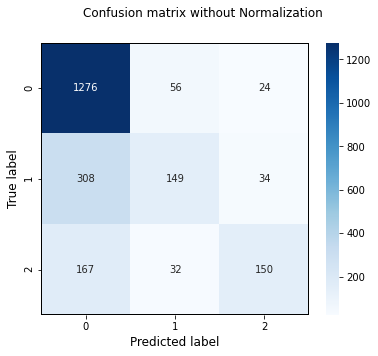

In [ ]:
plot_confusion_matrix(y_test,predictions)

In [ ]:
### Make predictions ###

# get some random test data
df[df.labels == 1].sample(3)

,data,labels
3638,@USAirways @VincesViews there are significant...,1
4574,"@united OK, thanks for the clarification.",1
4687,@AmericanAir tell me you can get me to ABI ear...,1


In [ ]:
small_sample = df[df.labels == 1].sample(3)
with open(folder / 'sample_test.csv', 'w') as f:
  f.write("data\n") # header
  for i, row in small_sample.iterrows():
    f.write(row['data'] + "\n")

In [ ]:
sample_dataset = ttd.TabularDataset(
    path=folder / 'sample_test.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT)]
)

In [ ]:
sample_iter = ttd.BucketIterator(
    sample_dataset,
    batch_size=32,
    sort_key=lambda x: len(x.data),
    device=device)

In [ ]:
for batch in sample_iter:
  # Returns a Batch object, not tensor
  print("inputs:", batch.data)

  # Forward pass
  outputs = model(batch.data)

  # Print logits
  print(outputs)

inputs: tensor([[  22,   38,   10,   29, 1066,  863,   11, 7686,    3, 1680, 7273, 7490,
            7,   26,  157,   36, 1557,    3, 1680, 2851, 3033,    2],
        [   1,    1,    1,   19, 2111,  822,  771,  282,    0,  439,   52,    0,
          665,   52,   41,    0,   34,    0,  439,    2,   26,    0],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,   12, 1546, 2031,    5,  419,  376,   11,  363,  898]],
       device='cuda:0')
tensor([[ 0.3732,  1.1082, -1.3575],
        [ 1.7149, -0.3141, -1.2386],
        [-0.5691,  1.2676, -0.2577]], device='cuda:0', grad_fn=<AddmmBackward>)
